In [9]:
!pip install graphviz
!pip install ipynb

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\znaya\anaconda1

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       h56e8100_0         152 KB  conda-forge
    cairo-1.16.0               |       he04af86_2         1.5 MB
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    expat-2.6.2                |       h63175ca_0         224 KB  conda-forge
    fribidi-1.0.10             |       h8d14728_0          63 KB  conda-forge
    getopt-win32-0.1           |       h8ffe710_0          19 KB  conda-forge
    glib-2.78.4                |       hd77b12b_0         491 KB
    glib-tools-2.78.4          |       hd77b12b_0          91 KB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==custom=py39_2
  - defaults/win-64::holoviews==1.18.1=py39haa95532_0
  - defaults/win-64::hvplot==0.9.1=py39haa95532_0
  - defaults/win-64::matplotlib==3.8.0=py39haa95532_0
  - defaults/win-64::seaborn==0.12.2=py39haa95532_0
  - defaults/win-64::_anaconda_depends==2023.09=py39_mkl_1


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score 
from yellowbrick.classifier import ConfusionMatrix #Confusion matrix visualization
import numpy as np

import graphviz
from sklearn.tree import export_graphviz #Tree visualization

from ipynb.fs.defs.Naive_bayes import categorical_enconding

In [37]:
credit = pd.read_csv("Credit.csv")
credit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [38]:
#choosing attb

class_ = credit["class"]
pred_variables = credit.drop("class",axis=1)

In [39]:
#categorical enconding
pred_variables = categorical_enconding(pred_variables)
pred_variables

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,2,6,1,7,1169,0,3,4,3,2,4,2,67,1,1,2,3,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,2,2,22,1,1,1,3,1,0,1
2,0,12,1,4,2096,3,1,2,3,2,3,2,49,1,1,1,2,2,0,1
3,2,42,3,5,7882,3,1,2,3,1,4,0,45,1,0,1,3,2,0,1
4,2,24,2,1,4870,3,0,3,3,2,4,1,53,1,0,2,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,3,5,1736,3,1,3,0,2,4,2,31,1,1,1,2,1,0,1
996,2,30,3,2,3857,3,0,4,1,2,4,0,40,1,1,1,0,1,1,1
997,0,12,3,7,804,3,3,4,3,2,4,3,38,1,1,1,3,1,0,1
998,2,45,3,7,1845,3,0,4,3,2,4,1,23,1,0,1,3,1,1,1


In [40]:
#Split

X_train, X_test, Y_train, Y_test = train_test_split(pred_variables,class_,
                                                   train_size=0.7,random_state=0)

In [41]:
#Model
tree = DecisionTreeClassifier()

#Train
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [35]:
#Exports the file that contains the complete tree visualization that can be open at "https://www.webgraphviz.com/"
export_graphviz(tree,out_file = 'tree.dot')

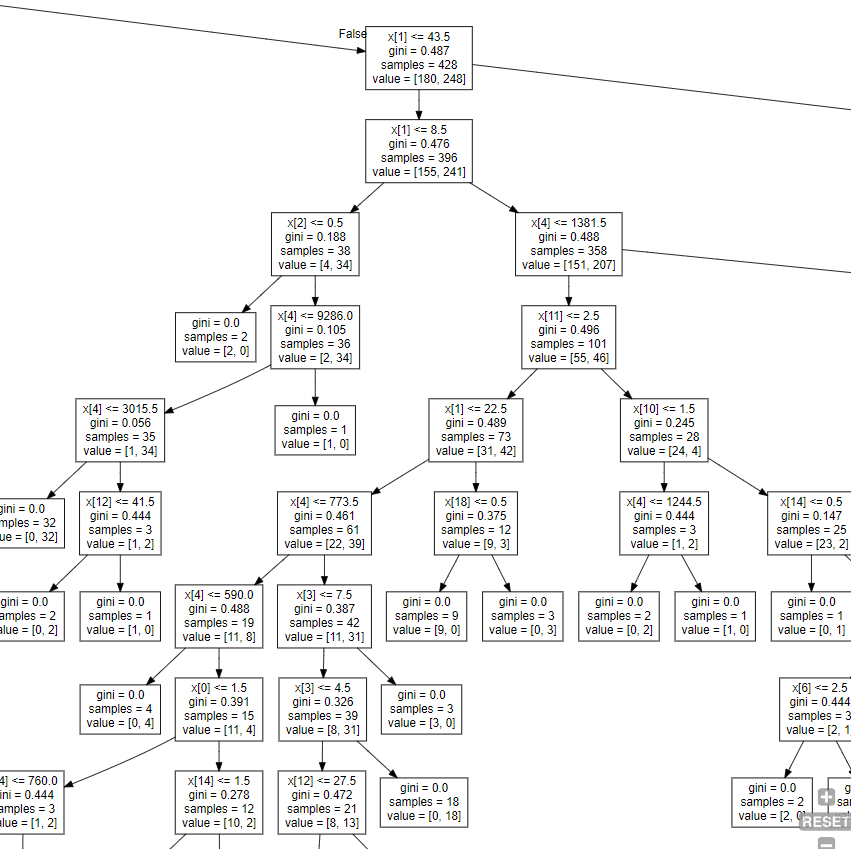

In [42]:
#Predict Test

predict = tree.predict(X_test)
predict

array(['bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',

In [44]:
#Check acc

acc = accuracy_score(Y_test,predict)
print(acc)

#check error
print(1 - acc)

0.6733333333333333
0.32666666666666666
